In [1]:
import pandas as pd
import numpy as np
import pandas_datareader
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
estimation_startdate = datetime(2022,5,31)
estimation_enddate = datetime(2022,11,26)

# 'FTSE 100', 'NASDAQ-100', 'S&P 500', 'CAC 40', 'DAX',
#           'Nikkei 225','Hang Seng Index',  'Shanghai Composite Index', 'S&P/ASX 200', 'S&P BSE SENSEX ',
#           'S&P/TSX Composite Index', 'STI Index', 'ESTX 50 PR.EUR','Russell 2000', 'FTSE MIB Index',
#           'S&P/ASX 50', 'Nifty 50', 'OMX Stockholm 30', 'PSI 20', 'Dow Jones Industrial Average',
#           'iShares MSCI World Index ETF', 'KOSPI Composite Index', 'OMX Copenhagen 25', 'TSEC weighted index', 
#            'S&P/NZX 50 INDEX GROSS', 'STXE 600 PR.EUR','BIST 100',
#            'iShares MSCI World Small Cap UCITS ETF ', 'MSCI AC Asia Pacific EX Japan Index FAM Fund Class I EUR Accumulation ',
#             'Vanguard FTSE Developed Europe ex-U.K. Equity Index Fund GBP Acc'

tickers = ['IMOEX.ME','^FTSE','^FCHI','DAX', 'ENY=F', '^HSI', '000001.SS','^AXJO', '^BSESN', 
           '^GSPTSE', '^STI', '^STOXX50E', '^RUT', 'FTSEMIB.MI', '^AFLI', '^NSEI','^OMX',
           'PSI20.LS', '^DJI', 'XWD.TO','^KS11','^OMXC25','^TWII','^NZ50', '^STOXX',
           'XU100.IS', 'WSML.L', '0P0001GY56.F', 'IEUR',  '0P0000KSP8.L']
marketPrices = pdr.get_data_yahoo(tickers, start = estimation_startdate, end = estimation_enddate)["Adj Close"]

[*********************100%***********************]  30 of 30 completed


In [3]:
marketPrices.head(10)

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-31,3186.429932,31667.869141,118.348999,26.079821,27180.0,24505.0,48.479923,2355.750000,6257.500000,6.3710,...,2685.899902,16584.550781,11308.339844,2042.640015,1682.189941,1864.040039,3232.489990,443.350006,3789.209961,16807.769531
2022-06-01,3182.159912,31532.039062,NaN,25.956308,27430.0,24284.0,47.758324,2374.600098,6231.149902,6.3060,...,NaN,16522.750000,11373.240234,2041.260010,1664.709961,1854.819946,3244.000000,438.720001,3759.540039,16675.089844
2022-06-02,3195.459961,NaN,117.065002,26.507359,27780.0,24427.0,48.850216,2340.169922,6189.660156,NaN,...,2658.989990,16628.000000,11349.540039,2075.679932,1669.040039,1897.670044,3226.719971,441.230011,3795.129883,16552.570312
2022-06-03,NaN,NaN,NaN,26.284088,27580.0,24167.0,48.204575,2308.030029,6222.330078,NaN,...,2670.649902,16584.300781,11417.339844,2069.409912,1676.489990,1883.050049,3231.969971,440.089996,3783.659912,NaN
2022-06-06,3236.370117,31933.279297,NaN,26.454153,28030.0,24566.0,48.432446,2282.159912,6273.370117,6.4325,...,NaN,16569.550781,NaN,NaN,NaN,1889.890015,3226.629883,NaN,NaN,16605.960938
2022-06-07,3241.760010,31690.769531,117.373001,26.462704,28210.0,24366.0,48.536888,2291.620117,6349.209961,6.4285,...,2626.340088,16416.349609,11265.700195,2074.209961,1697.819946,1919.560059,3231.540039,442.880005,3806.739990,16512.880859
2022-06-08,3263.790039,31670.599609,118.643997,26.085520,28150.0,24237.0,47.862770,2318.850098,6334.919922,6.4680,...,2626.149902,16356.250000,11266.240234,2069.929932,1682.430054,1891.010010,3225.800049,440.369995,3788.929932,16670.509766
2022-06-09,3238.949951,30980.599609,118.530998,25.395760,27970.0,23777.0,46.630737,2293.989990,6301.729980,6.3245,...,2625.439941,16478.099609,11211.309570,2044.060059,1651.140015,1850.859985,3209.620117,434.380005,3724.449951,16621.339844
2022-06-10,3284.830078,30290.470703,118.507004,24.521681,27330.0,22547.0,45.358902,2285.520020,6087.959961,6.0905,...,2595.870117,16201.799805,11136.280273,1990.800049,1619.140015,1800.280029,3181.729980,422.709991,3599.199951,16460.119141


In [4]:
marketReturns  = marketPrices.pct_change(1).dropna()
#marketReturns = np.where(int(marketReturns) == 0, )
marketReturns.head()

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-01,-0.001340,-0.004289,0.000000,-0.004736,0.009198,-0.009019,-0.014885,0.008002,-0.004211,-0.010202,...,0.000000,-0.003726,0.005739,-0.000676,-0.010391,-0.004946,0.003561,-0.010443,-0.007830,-0.007894
2022-06-02,0.004180,0.000000,-0.010849,0.021230,0.012760,0.005889,0.022863,-0.014499,-0.006658,0.000000,...,-0.010019,0.006370,-0.002084,0.016862,0.002601,0.023102,-0.005327,0.005721,0.009467,-0.007347
2022-06-03,0.000000,0.000000,0.000000,-0.008423,-0.007199,-0.010644,-0.013217,-0.013734,0.005278,0.000000,...,0.004385,-0.002628,0.005974,-0.003021,0.004464,-0.007704,0.001627,-0.002584,-0.003022,0.000000
2022-06-06,0.012803,0.012725,0.000000,0.006470,0.016316,0.016510,0.004727,-0.011209,0.008203,0.020060,...,0.000000,-0.000889,0.000000,0.000000,0.000000,0.003632,-0.001652,0.000000,0.000000,0.003226
2022-06-07,0.001665,-0.007594,0.002631,0.000323,0.006422,-0.008141,0.002156,0.004145,0.012089,-0.000622,...,-0.016591,-0.009246,-0.013282,0.002320,0.012723,0.015699,0.001522,0.006340,0.006100,-0.005605


In [5]:
marketReturns["whole market"] = marketReturns.mean(axis = 1)
marketReturns.head()

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-01,-0.001340,-0.004289,0.000000,-0.004736,0.009198,-0.009019,-0.014885,0.008002,-0.004211,-0.010202,...,-0.003726,0.005739,-0.000676,-0.010391,-0.004946,0.003561,-0.010443,-0.007830,-0.007894,-0.002930
2022-06-02,0.004180,0.000000,-0.010849,0.021230,0.012760,0.005889,0.022863,-0.014499,-0.006658,0.000000,...,0.006370,-0.002084,0.016862,0.002601,0.023102,-0.005327,0.005721,0.009467,-0.007347,0.004011
2022-06-03,0.000000,0.000000,0.000000,-0.008423,-0.007199,-0.010644,-0.013217,-0.013734,0.005278,0.000000,...,-0.002628,0.005974,-0.003021,0.004464,-0.007704,0.001627,-0.002584,-0.003022,0.000000,-0.002428
2022-06-06,0.012803,0.012725,0.000000,0.006470,0.016316,0.016510,0.004727,-0.011209,0.008203,0.020060,...,-0.000889,0.000000,0.000000,0.000000,0.003632,-0.001652,0.000000,0.000000,0.003226,0.005044
2022-06-07,0.001665,-0.007594,0.002631,0.000323,0.006422,-0.008141,0.002156,0.004145,0.012089,-0.000622,...,-0.009246,-0.013282,0.002320,0.012723,0.015699,0.001522,0.006340,0.006100,-0.005605,-0.000860


In [6]:
Beta = {}
var = marketReturns["whole market"].var()
for col in marketReturns:
    cov = marketReturns[col].cov(marketReturns["whole market"])
    Beta[col] = cov/var
Beta

{'000001.SS': 0.31008139669378015,
 '0P0000KSP8.L': 1.0973611392797815,
 '0P0001GY56.F': 0.44566770794531996,
 'DAX': 1.8452495298174652,
 'ENY=F': 0.9191389635152881,
 'FTSEMIB.MI': 1.4915786052472757,
 'IEUR': 1.690249572623735,
 'IMOEX.ME': 0.7338956778912903,
 'PSI20.LS': 0.8902653364132891,
 'WSML.L': 1.6367643929545945,
 'XU100.IS': 1.0448217212902942,
 'XWD.TO': 0.9990689197088751,
 '^AFLI': 0.6001495956504559,
 '^AXJO': 0.6433144854731452,
 '^BSESN': 0.6682427921112646,
 '^DJI': 1.1353431895352162,
 '^FCHI': 1.2682553464519348,
 '^FTSE': 0.8858681053564875,
 '^GSPTSE': 1.140320703974754,
 '^HSI': 0.9254125013496255,
 '^KS11': 0.7314458552574707,
 '^NSEI': 0.6714485225630131,
 '^NZ50': 0.37128212794170995,
 '^OMX': 1.2537017918544289,
 '^OMXC25': 1.2504514825614197,
 '^RUT': 1.655745848257687,
 '^STI': 0.38512553447099096,
 '^STOXX': 1.191164976309746,
 '^STOXX50E': 1.390143481273863,
 '^TWII': 0.7284406962257955,
 'whole market': 1.0}

In [7]:
event_startdate = datetime(2022,11,27)
event_enddate = datetime(2022,12,8)
eventPrices = pdr.get_data_yahoo(tickers, start = event_startdate, end = event_enddate)["Adj Close"]
eventPrices

[*********************100%***********************]  30 of 30 completed


,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-28,3078.550049,32113.640625,108.178001,25.034117,28090.0,24441.0,46.145302,2177.449951,5818.759766,6.1885,...,2408.270020,18562.750000,11418.200195,2096.379883,1673.420044,1830.959961,3240.060059,437.850006,3935.510010,14556.870117
2022-11-29,3149.750000,32000.380859,111.286003,25.141266,27990.0,24466.0,46.271515,2185.320068,5830.419922,6.1425,...,2433.389893,18618.050781,11411.389648,2092.239990,1672.089966,1836.550049,3276.360107,437.290009,3934.439941,14709.639648
2022-11-30,3151.340088,32283.779297,113.838997,25.530901,28370.0,24610.0,47.145298,2174.530029,5862.689941,6.1440,...,2472.530029,18758.349609,11552.040039,2102.419922,1686.609985,1886.579956,3290.489990,440.040009,3964.719971,14879.549805
2022-12-01,3165.469971,32197.609375,113.346001,25.706238,28010.0,24686.0,47.611313,2187.290039,5927.229980,6.3135,...,2479.840088,18812.500000,11654.559570,2125.090088,1713.250000,1881.680054,3292.729980,443.959991,3984.500000,15012.799805
2022-12-02,3156.139893,32256.199219,NaN,25.881575,27710.0,24622.0,47.718113,2180.439941,5856.569824,6.3050,...,2434.330078,18696.099609,11641.849609,2129.469971,1717.880005,1892.839966,3259.139893,443.290009,3977.899902,14970.679688
2022-12-05,3211.810059,32280.740234,113.871002,25.433493,27690.0,24548.0,47.203548,2208.280029,5865.470215,6.2335,...,2419.320068,18701.050781,11613.120117,2139.689941,1718.969971,1840.219971,3267.540039,441.470001,3956.530029,14980.740234
2022-12-06,3212.530029,31978.529297,112.703003,25.228935,27660.0,24265.0,46.873451,2196.239990,5852.779785,6.1420,...,2393.159912,18642.750000,11570.150391,2111.280029,1703.699951,1812.579956,3252.370117,438.920013,3939.189941,14728.879883
2022-12-07,3199.620117,31851.019531,111.040001,25.365307,27590.0,24241.0,46.863747,2192.879883,5799.669922,6.1050,...,2382.810059,18560.500000,11641.599609,2088.429932,1698.000000,1806.900024,3225.449951,436.200012,3920.899902,14630.009766


In [8]:
eventReturns = eventPrices.pct_change(1).dropna()
eventReturns["whole market"] = eventReturns.mean(axis = 1)
eventReturns

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-29,0.023128,-0.003527,0.028730,0.004280,-0.003560,0.001023,0.002735,0.003614,0.002004,-0.007433,...,0.002979,-0.000596,-0.001975,-0.000795,0.003053,0.011204,-0.001279,-0.000272,0.010495,0.005603
2022-11-30,0.000505,0.008856,0.022941,0.015498,0.013576,0.005886,0.018884,-0.004938,0.005535,0.000244,...,0.007536,0.012325,0.004866,0.008684,0.027241,0.004313,0.006289,0.007696,0.011551,0.009923
2022-12-01,0.004484,-0.002669,-0.004331,0.006868,-0.012689,0.003088,0.009885,0.005868,0.011009,0.027588,...,0.002887,0.008875,0.010783,0.015795,-0.002597,0.000681,0.008908,0.004989,0.008955,0.005164
2022-12-02,-0.002947,0.001820,0.000000,0.006821,-0.010710,-0.002593,0.002243,-0.003132,-0.011921,-0.001346,...,-0.006187,-0.001091,0.002061,0.002702,0.005931,-0.010201,-0.001509,-0.001656,-0.002806,-0.003266
2022-12-05,0.017639,0.000761,0.004632,-0.017313,-0.000722,-0.003005,-0.010783,0.012768,0.001520,-0.011340,...,0.000265,-0.002468,0.004799,0.000634,-0.027799,0.002577,-0.004106,-0.005372,0.000672,-0.000932
2022-12-06,0.000224,-0.009362,-0.010257,-0.008043,-0.001083,-0.011528,-0.006993,-0.005452,-0.002164,-0.014679,...,-0.003118,-0.003700,-0.013278,-0.008883,-0.015020,-0.004643,-0.005776,-0.004383,-0.016812,-0.006716
2022-12-07,-0.004019,-0.003987,-0.014756,0.005405,-0.002531,-0.000989,-0.000207,-0.001530,-0.009074,-0.006024,...,-0.004412,0.006175,-0.010823,-0.003346,-0.003134,-0.008277,-0.006197,-0.004643,-0.006713,-0.006021


In [9]:
non_risk_insterest_rate = 0.0384

abnormalReturns = pd.DataFrame()

for col in marketReturns:
    abnormalReturns[col] = non_risk_insterest_rate + Beta[col]*(eventReturns[col] - non_risk_insterest_rate) - eventReturns[col]

abnormalReturns

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-29,0.010537,-0.004082,0.005360,-0.028840,0.003393,-0.018374,-0.024618,0.009257,0.003994,-0.029185,...,0.011638,0.024518,-0.010243,-0.009816,-0.023179,0.016722,-0.007585,-0.015088,0.007578,8.673617e-19
2022-11-30,0.026145,-0.002876,0.008570,-0.019358,0.002007,-0.015983,-0.013471,0.011532,0.003606,-0.024296,...,0.010141,0.016394,-0.008508,-0.007442,-0.007317,0.020959,-0.006139,-0.011979,0.007291,0.000000e+00
2022-12-01,0.023399,-0.003999,0.023687,-0.026653,0.004131,-0.017359,-0.019683,0.008657,0.003006,-0.006885,...,0.011668,0.018563,-0.007007,-0.005661,-0.026884,0.023193,-0.005638,-0.013035,0.007996,1.734723e-18
2022-12-02,0.028526,-0.003562,0.021286,-0.026692,0.003971,-0.020151,-0.024957,0.011052,0.005522,-0.025309,...,0.014649,0.024828,-0.009219,-0.008940,-0.021292,0.029884,-0.007629,-0.015628,0.011190,8.673617e-19
2022-12-05,0.014324,-0.003665,0.018719,-0.047091,0.003163,-0.020354,-0.033949,0.006821,0.004047,-0.031673,...,0.012529,0.025694,-0.008525,-0.009458,-0.043410,0.022026,-0.008126,-0.017077,0.010245,3.252607e-18
2022-12-06,0.026338,-0.004650,0.026972,-0.039256,0.003193,-0.024544,-0.031333,0.011669,0.004451,-0.033799,...,0.013641,0.026469,-0.013111,-0.011842,-0.035030,0.026466,-0.008445,-0.016691,0.014993,-8.673617e-19
2022-12-07,0.029265,-0.004127,0.029466,-0.027889,0.003310,-0.019363,-0.026648,0.010626,0.005210,-0.028288,...,0.014066,0.020260,-0.012488,-0.010455,-0.027235,0.028701,-0.008525,-0.016793,0.012251,8.673617e-19


In [10]:
all_AR = pd.DataFrame(abnormalReturns.mean(axis = 1)/len(tickers))
all_AR.columns = ['AAR']
all_AR

,AAR
Date,
2022-11-29,-0.000055
2022-11-30,0.000023
2022-12-01,0.000022
2022-12-02,0.000039
2022-12-05,-0.000086
2022-12-06,-0.000024
2022-12-07,0.000018


In [11]:
CAR_list = [all_AR.iloc[0]["AAR"]]
for i in range(1, len(all_AR)):
    CAR_list.append(all_AR.iloc[i-1]["AAR"]+all_AR.iloc[i]["AAR"])
all_AR["CAR"] = CAR_list
all_AR

,AAR,CAR
Date,,
2022-11-29,-0.000055,-0.000055
2022-11-30,0.000023,-0.000032
2022-12-01,0.000022,0.000045
2022-12-02,0.000039,0.000061
2022-12-05,-0.000086,-0.000046
2022-12-06,-0.000024,-0.000110
2022-12-07,0.000018,-0.000006


# whole market

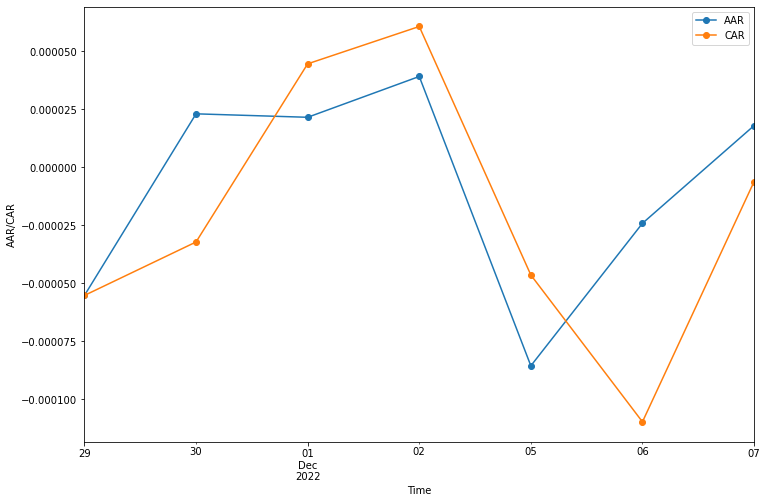

In [12]:
all_AR.plot(figsize = (12,8), marker = 'o')
plt.xlabel("Time")
plt.ylabel("AAR/CAR")
plt.show()